## Importings

In [25]:
# Importing basic stuff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Train test split
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Gridsearch
from sklearn.model_selection import GridSearchCV

# pipeline
from sklearn.pipeline import Pipeline

## Reading data

In [26]:
# Naming the columns of the dataset. https://stackoverflow.com/questions/31645466/give-column-name-when-read-csv-file-pandas
colNames = ['polarity', 'title', 'text']

# Loading Dataset and assigning column names
df = pd.read_csv("./data/test.csv", names=colNames, header=None)

# Resizing the dataset, for faster computing time. A random sample from the dataset https://stackoverflow.com/questions/40986230/reduce-dataframe-size-in-pandas
df = df.sample(frac=0.1) # Get 10% of the data

In [27]:
# Looking on the data
(
    df
    #.sample(5)
    #.dtypes
    .info()
    #.loc[:,["polarity"]]
    #.loc[:,["title"]]
    #.loc[:,["text"]]
    #.value_counts()
    #.value_counts(normalize=True) # For seeing the count in %
    #.describe()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 118026 to 162464
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  40000 non-null  int64 
 1   title     39998 non-null  object
 2   text      40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [28]:
# Cleaning the data. Removing null values and only take the values that contain info.
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
df.dropna(how='any')
df = df[df['title'].notna()]
df = df[df['text'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 118026 to 162464
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  39998 non-null  int64 
 1   title     39998 non-null  object
 2   text      39998 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [29]:
# Assigning values to X and Y
xText = df.text
xTitle = df.title
y = df.polarity

xText.head(1)

118026    Will be using to assist students in HS Geometr...
Name: text, dtype: object

In [30]:
# Train test split of data. Putting O at the end of the X variables for "original"
X_train, X_test, y_train, y_test = train_test_split(xText, y, test_size=0.33, random_state=42)

In [31]:
# Looking on one example
print("type of X_train: {}".format(type(X_train)))
print("length of X_train: {}".format(len(X_train)))
print("X_train[1]:\n{}".format(X_train.iloc[1500]))

type of X_train: <class 'pandas.core.series.Series'>
length of X_train: 26798
X_train[1]:
This is the worst waste of money that i have ever spent. Within three minutes on one broken, the other one kept falling off. The first three minutes were great. Do you realize how much walking you would have to do to do a whole yard? It would take days.


## Basics - Countvectorizer plus logistic regression

In [32]:
# Applying Count vectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_trainB = vect.transform(X_train)
X_testB = vect.transform(X_test)


In [33]:
# Looking on the vectorized features. See page 331 for code
feature_names = vect.get_feature_names_out() # under methods: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 56428
First 20 features:
['00' '000' '0000' '000000' '00000002' '00001' '0005' '000city' '001bk'
 '002' '004' '007' '00700' '00am' '00s' '01' '010' '0123' '016391' '02']
Features 20010 to 20030:
['fools' 'foonatic' 'fooods' 'foor' 'foos' 'foot' 'footage' 'footbagging'
 'footbal' 'football' 'footballers' 'footboard' 'footed' 'footgae'
 'foothold' 'footing' 'footings' 'footlage' 'footlocker' 'footnote']
Every 2000th feature:
['00' 'adhesive' 'arround' 'beussinesswith' 'buttonholes' 'clarinets'
 'coulter' 'describir' 'duds' 'evolved3' 'foofoo' 'grady' 'hoes'
 'instrumental' 'kitchenart' 'lryics' 'midtown' 'newspapers' 'pageturning'
 'polaris' 'quilty' 'resurrected' 'scratches' 'smalvil3' 'stretchs'
 'theirs' 'twitty' 'viz' 'yecch']


In [34]:
# Making a logistic regression model
BaseLR = LogisticRegression(max_iter=10000)

# Fitting the model
BaseLR.fit(X_trainB, y_train)


LogisticRegression(max_iter=10000)

In [35]:
# Evaluating results
y_pred = BaseLR.predict(X_testB)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.83      0.84      6578
           2       0.84      0.86      0.85      6622

    accuracy                           0.84     13200
   macro avg       0.84      0.84      0.84     13200
weighted avg       0.84      0.84      0.84     13200



In [36]:
# Confusion matrix
# Making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5487 1091]
 [ 959 5663]]


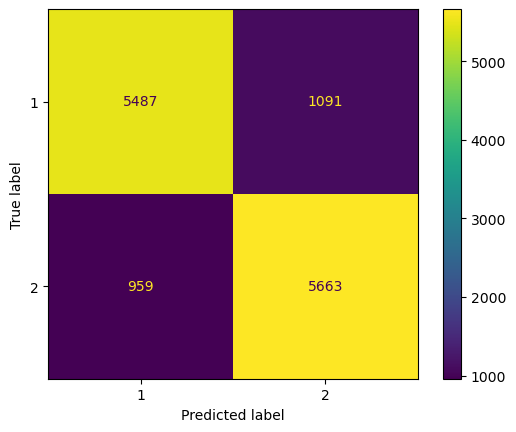

In [37]:
# Displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=BaseLR.classes_)
disp.plot()
plt.show()

## Further modelling

In [48]:
# Making some variables for transformer and vectorizer to be used across all the pipelines. This does not work, yet
# countV = 'CountVectorizer__ngram_range':[(1,1),(1,2)]
# trans = 'TfidfTransformer__use_idf':[True,False]

SyntaxError: invalid syntax (911550018.py, line 2)

In [38]:
# Using Pipeline https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# Inspiration from here as well: https://medium.com/@soohyunniekimm/logistic-regression-with-columntransformer-pipeline-and-gridsearchcv-d2e3a781422f
# Defining pipe for logistic regression
pipeLR = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', LogisticRegression())
])

# Fitting the pipeline with the data
pipeLR.fit(X_train, y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('TfidfTransformer', TfidfTransformer()),
                ('Model', LogisticRegression())])

In [39]:
# Printing scores
print("Accuracy on training set: {:.3f}".format(pipeLR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeLR.score(X_test, y_test)))

ValueError: Found input variables with inconsistent numbers of samples: [26798, 26799]

In [24]:
# Pipeline together with gridsearchCV: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# Defining parameters for the param grid
params = {
    countV,
    trans,
    'Model__C':[0.01, 0.1, 1, 10, 100],
    'Model__max_iter':[10000]
}

# Defining grid search
search = GridSearchCV(
    pipeLR,
    param_grid=params,
    cv=2
)

# Fitting the grid search
search.fit(X_train, y_train)

Accuracy on training set: 1.000


AttributeError: lower not found

In [40]:
# Printing results
print("Accuracy on training set: {:.3f}".format(search.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(search.score(X_test, y_test)))
print("Best params: ", search.best_params_) # Printing the best params

Accuracy on training set: 0.891
Accuracy on test set: 0.892
Best params:  {'CountVectorizer__ngram_range': (1, 2), 'Model__C': 100, 'Model__max_iter': 10000, 'TfidfTransformer__use_idf': True}


In [42]:
# Defining pipe for MLP
pipeMLP = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', MLPClassifier())
])

# Fitting the pipeline with the data
pipeMLP.fit(X_train, y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('TfidfTransformer', TfidfTransformer()),
                ('Model', MLPClassifier())])

In [44]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeMLP.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeMLP.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.823


In [49]:
# Defining parameters for the param grid
params = {
    'CountVectorizer__ngram_range':[(1,1),(1,2)],
    'TfidfTransformer__use_idf':[True,False],
    'Model__activation':['tanh','relu'],
    'Model__solver':['lbfgs'],
    'Model__hidden_layer_sizes':[50,100,150]
}

# Defining grid search with the pipeline
searchMLP = GridSearchCV(
    pipeMLP,
    param_grid=params,
    cv=2
)

# Fitting the grid search
searchMLP.fit(X_train, y_train)

c:\Users\lynma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\lynma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


KeyboardInterrupt: 

In [ ]:
# Printing results for MLP
print("Accuracy on training set: {:.3f}".format(searchMLP.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(searchMLP.score(X_test, y_test)))
print("Best params: ", searchMLP.best_params_) # Printing the best params

In [ ]:
# Defining pipe for Naive Bayes
pipeNB = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', MultinomialNB())
])

# Fitting the pipeline with the data
pipeNB.fit(X_train, y_train)

In [ ]:
# Printing scores on the simple version of the model
print("Accuracy on training set: {:.3f}".format(pipeNB.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipeNB.score(X_test, y_test)))

In [ ]:
# Defining parameters for the param grid
params = {
    'CountVectorizer__ngram_range':[(1,1),(1,2)],
    'TfidfTransformer__use_idf':[True,False],
    'Model__alpha':[1] # other parameters to be defined
}

# Defining grid search with the pipeline
searchNB = GridSearchCV(
    pipeNB,
    param_grid=params,
    cv=2
)

# Fitting the grid search
searchNB.fit(X_train, y_train)

### Experiment

In [41]:
# Making a function for pipelines with gridsearch.
def fullPipeGrid(name, model, params):
    pipe = Pipeline(steps=[
        'vect',CountVectorizer(),
        'trans',TfidfTransformer(),
        'Model', model()
    ])

    # Parameters for countvectorizer and tfid transformer are fixed. We test for uni-, bi- and trigrams.
    paramsVect = {
        'CountVectorizer__ngram_range':[(1,1),(1,2),(1,3)],
        'TfidfTransformer__use_idf':[True,False],
    }

    paramsModel ={
        'model'
    }

    # Making the GridSearch
    grid = GridSearchCV(
        pipe,
        param_grid=params,
        cv = 2 # CV on 2, while building the code
    )
    grid.fit(X_train, y_train)
    print(name)
    print("Accuracy on training set: {:.3f}".format(grid.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(grid.score(X_test, y_test)))
    print("Best params: ", grid.best_params_) # Printing the best params
    print(" ")


SyntaxError: invalid syntax (2699255659.py, line 14)